In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
%matplotlib inline

filename = "./data/wine.csv"
df = pd.read_csv(filename)
# drop col index
df = df.drop(['index'],axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
filename = "./data/wine.csv"
df = pd.read_csv(filename)
# drop col index
df = df.drop(['index'],axis = 1)
scaler = StandardScaler()

In [3]:
#Resample:
df_majority = df[df['quality']== 6]
for i in range(3,10):
    majority_len = df[df['quality']== 6].shape[0]
    if i != 6:
        minority_len = df[df['quality'] == i].shape[0]

        df_minority = df[df['quality'] == i]

        df_majority_upsampled = resample(df_minority,replace=True,n_samples = majority_len,random_state=1)

        df_majority = df_majority.append(df_majority_upsampled)
        

df = df_majority
print(df.shape)
print(df['quality'].value_counts())
df = df.sample(frac=1).reset_index(drop=True) # Shuffle dataframe
df

(19852, 12)
3    2836
4    2836
5    2836
6    2836
7    2836
8    2836
9    2836
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.4,0.59,0.07,7.00,0.045,36.0,147.0,0.99440,3.34,0.57,9.7,6
1,5.3,0.30,0.20,1.10,0.077,48.0,166.0,0.99440,3.30,0.54,8.7,4
2,12.7,0.60,0.49,2.80,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,5
3,7.5,0.21,0.32,4.80,0.056,39.0,113.0,0.99393,3.11,0.52,10.2,7
4,6.9,0.36,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
19847,6.7,0.25,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,3
19848,7.1,0.26,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
19849,6.2,0.28,0.28,4.30,0.026,22.0,105.0,0.98900,2.98,0.64,13.1,8
19850,7.1,0.16,0.25,1.30,0.034,28.0,123.0,0.99150,3.27,0.55,11.4,6


In [4]:
# Creating a test/train split

train_test_split_fraction = 0.80
split_index = int(df.shape[0] * train_test_split_fraction)
df_train = df[:split_index]
df_test = df[split_index:]

target = pd.get_dummies(df['quality']).values # One hot encode

#target[:5]
#target = df['quality'].to_numpy()
#target = target.reshape(6497,1)

target

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
# Selecting the features and the target
X_train = df_train.drop('quality', axis = 1).values
X_test = df_test.drop('quality', axis = 1).values

y_train = target[:split_index]
y_test = target[split_index:]
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15881, 11)
(3971, 11)
(15881, 7)
(3971, 7)


In [6]:
X_train = torch.tensor(X_train.astype(np.float32)) 
y_train = torch.tensor(y_train.astype(np.float32))
X_test = torch.tensor(X_test.astype(np.float32)) 
y_test = torch.tensor(y_test.astype(np.float32))

In [7]:
# NEED TO DEFINE NEURONS,BATCH,EPOCHS,NB_LAYER,MODEL,LOSS FUNC
nb_hidden_neurons = 100
nb_layer = 5 
nb_features=X_train.shape[1]
nb_classes = len(pd.unique(df['quality']))
activation_function = nn.SiLU()
activation_function_2 = nn.Sigmoid()
last_layer_activation = nn.Softmax(dim=1)
layer_kind = nn.Linear
batch_size = 100
epochs = 200
criterion = nn.MSELoss()
learning_rate = 0.001

In [8]:
class Network(nn.Module):

    def __init__(self,nb_features,nb_classes,nb_layer,activation_function,activation_function_2,last_layer_activation,layer_kind,nb_hidden_neurons):
        """Here we define the layers
        """
        
        super().__init__()
        self.activation_function = activation_function
        self.activation_function_2 = activation_function_2
        self.last_layer_activation = last_layer_activation
        
       

        for i in range(1,nb_layer):
            if i == 1 :
                setattr(self, f"layer_{i}", layer_kind(nb_features,nb_hidden_neurons))
            elif i == nb_layer-1:
                setattr(self, f"layer_{i}", layer_kind(nb_hidden_neurons,nb_classes))
            else:
                setattr(self, f"layer_{i}", layer_kind(nb_hidden_neurons,nb_hidden_neurons))
            
        
        

    def forward(self,x):
        """Here we combine the layers
        """
        for i in range(1,nb_layer):
            if i == nb_layer-1:
                x = self.last_layer_activation(getattr(self,f'layer_{i}')(x))
            elif i == 2:
                x = self.activation_function_2(getattr(self,f'layer_{i}')(x))
            else:
                x = self.activation_function(getattr(self,f'layer_{i}')(x))
                
        return x

In [9]:
my_nn = Network(nb_features,nb_classes,nb_layer,activation_function,activation_function_2,last_layer_activation,layer_kind,nb_hidden_neurons)
my_nn



Network(
  (activation_function): SiLU()
  (activation_function_2): Sigmoid()
  (last_layer_activation): Softmax(dim=1)
  (layer_1): Linear(in_features=11, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=100, bias=True)
  (layer_4): Linear(in_features=100, out_features=7, bias=True)
)

In [10]:
optimizer = torch.optim.Adam(my_nn.parameters(), lr=learning_rate)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [11]:
def training(batch_size : int, nb_steps_loss_sum : int,epochs):
    """ Train the neural network, feeding it `batch_size` at a time
    and saving statistics every `nb_steps_loss_sum` steps.
    
    Arguments:
    
    - batch_size [int] : the number of input samples at each training step (called a batch)
    - nb_steps_loss_sum [int] : the number of batches before saving the loss for plotting
    
    Returns:
    - loss_list : [List[double]] : value of the loss every `nb_steps_loss_sum` steps
    """

    loss_list = []
    running_loss = 0
    batch_nb = 0

    for epoch in range(0,epochs): # Number of times to iterate through the complete dataset
        for idx in range(0, X_train.shape[0], batch_size):
            
            input_batch = X_train[idx:idx + batch_size]
            target = y_train[idx:idx + batch_size]
            my_nn.zero_grad()   # zero the gradient buffers
            output = my_nn(input_batch)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step() 
            # print statistics
            running_loss += loss.item()
            # Print and reset every `running_loss_steps` batches
            save_loss_condition = batch_nb % nb_steps_loss_sum == (nb_steps_loss_sum - 1)
            if save_loss_condition:    
                loss_list.append(running_loss)
                running_loss = 0.0


            batch_nb+= 1
        
    return loss_list

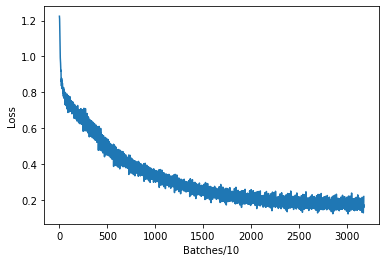

In [12]:
nb_steps_loss_sum = 10
loss = training(batch_size=batch_size, nb_steps_loss_sum=nb_steps_loss_sum,epochs=epochs)

# Plotting the loss over training
plt.figure()
plt.plot(range(0, len(loss)), loss)
plt.xlabel(f"Batches/{nb_steps_loss_sum}")
plt.ylabel("Loss")
plt.show()
plt.close()

In [13]:
def computeScore(X, y,batch_size):
    correct = 0
    total = 0
    with torch.no_grad():
        for idx in range(0, X.shape[0], batch_size):
            
            outputs = my_nn(X)
            max_pred = torch.max(outputs,1)
            max_target = torch.max(y,1)
            if max_pred[1][idx]==max_target[1][idx]:
                correct += 1
            total = total +1
        
    accuracy = correct/total * 100
    print(f"Accuracy of the network on the {total} samples: {accuracy:.2f}%")

In [14]:
computeScore(X_train, y_train,batch_size)
computeScore(X_test, y_test,batch_size)

TypeError: computeScore() missing 1 required positional argument: 'batch_size'